<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.109565,82.011865,1.864778,121.986208,119.817045,2.169163
1,0.0,1.0,58.955216,39.122142,1.156583,109.233941,108.108925,1.125016
2,0.0,2.0,56.207543,25.431183,2.777996,94.416722,91.598828,2.817894
3,0.0,3.0,34.461113,96.405293,8.312328,149.178734,140.686291,8.492443
4,0.0,4.0,58.580683,49.230109,-3.066482,114.744310,117.861023,-3.116712
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,20.458746,96.050787,2.876674,129.386207,126.041827,3.344380
249996,999.0,246.0,63.139016,57.964679,-4.186129,126.917566,130.822562,-3.904995
249997,999.0,247.0,90.492791,62.871019,-0.343771,163.020039,162.645770,0.374270
249998,999.0,248.0,32.339377,73.487681,-0.985849,114.841209,115.638342,-0.797132


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.109565,82.011865,1.864778,121.986208,119.817045,2.169163
1,0.0,1.0,58.955216,39.122142,1.156583,109.233941,108.108925,1.125016
2,0.0,2.0,56.207543,25.431183,2.777996,94.416722,91.598828,2.817894
3,0.0,3.0,34.461113,96.405293,8.312328,149.178734,140.686291,8.492443
4,0.0,4.0,58.580683,49.230109,-3.066482,114.744310,117.861023,-3.116712
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,20.458746,96.050787,2.876674,129.386207,126.041827,3.344380
249996,999.0,246.0,63.139016,57.964679,-4.186129,126.917566,130.822562,-3.904995
249997,999.0,247.0,90.492791,62.871019,-0.343771,163.020039,162.645770,0.374270
249998,999.0,248.0,32.339377,73.487681,-0.985849,114.841209,115.638342,-0.797132


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.109565  82.011865  1.864778  121.986208  119.817045  2.169163
      1.0    58.955216  39.122142  1.156583  109.233941  108.108925  1.125016
      2.0    56.207543  25.431183  2.777996   94.416722   91.598828  2.817894
      3.0    34.461113  96.405293  8.312328  149.178734  140.686291  8.492443
      4.0    58.580683  49.230109 -3.066482  114.744310  117.861023 -3.116712
...                ...        ...       ...         ...         ...       ...
999.0 245.0  20.458746  96.050787  2.876674  129.386207  126.041827  3.344380
      246.0  63.139016  57.964679 -4.186129  126.917566  130.822562 -3.904995
      247.0  90.492791  62.871019 -0.343771  163.020039  162.645770  0.374270
      248.0  32.339377  73.487681 -0.985849  114.841209  115.638342 -0.797132
      249.0  59.591510  87.399388  0.793836  157.784734  156.195609  1.589125

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.109565  82.011865  1.864778  121.986208  119.817045  2.169163
      1.0    58.955216  39.122142  1.156583  109.233941  108.108925  1.125016
      2.0    56.207543  25.431183  2.777996   94.416722   91.598828  2.817894
      3.0    34.461113  96.405293  8.312328  149.178734  140.686291  8.492443
      4.0    58.580683  49.230109 -3.066482  114.744310  117.861023 -3.116712
...                ...        ...       ...         ...         ...       ...
999.0 245.0  20.458746  96.050787  2.876674  129.386207  126.041827  3.344380
      246.0  63.139016  57.964679 -4.186129  126.917566  130.822562 -3.904995
      247.0  90.492791  62.871019 -0.343771  163.020039  162.645770  0.374270
      248.0  32.339377  73.487681 -0.985849  114.841209  115.638342 -0.797132
      249.0  59.591510  87.399388  0.793836  157.784734  156.195609  1.589125

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.109565,82.011865,1.864778,121.986208,119.817045,2.169163
1,0.0,1.0,58.955216,39.122142,1.156583,109.233941,108.108925,1.125016
2,0.0,2.0,56.207543,25.431183,2.777996,94.416722,91.598828,2.817894
3,0.0,3.0,34.461113,96.405293,8.312328,149.178734,140.686291,8.492443
4,0.0,4.0,58.580683,49.230109,-3.066482,114.744310,117.861023,-3.116712
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,20.458746,96.050787,2.876674,129.386207,126.041827,3.344380
249996,999.0,246.0,63.139016,57.964679,-4.186129,126.917566,130.822562,-3.904995
249997,999.0,247.0,90.492791,62.871019,-0.343771,163.020039,162.645770,0.374270
249998,999.0,248.0,32.339377,73.487681,-0.985849,114.841209,115.638342,-0.797132


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.109565  82.011865  1.864778  121.986208  119.817045  2.169163
      1.0    58.955216  39.122142  1.156583  109.233941  108.108925  1.125016
      2.0    56.207543  25.431183  2.777996   94.416722   91.598828  2.817894
      3.0    34.461113  96.405293  8.312328  149.178734  140.686291  8.492443
      4.0    58.580683  49.230109 -3.066482  114.744310  117.861023 -3.116712
...                ...        ...       ...         ...         ...       ...
999.0 245.0  20.458746  96.050787  2.876674  129.386207  126.041827  3.344380
      246.0  63.139016  57.964679 -4.186129  126.917566  130.822562 -3.904995
      247.0  90.492791  62.871019 -0.343771  163.020039  162.645770  0.374270
      248.0  32.339377  73.487681 -0.985849  114.841209  115.638342 -0.797132
      249.0  59.591510  87.399388  0.793836  157.784734  156.195609  1.589125

[250000 rows x 6 columns]

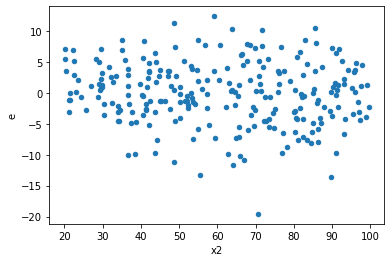

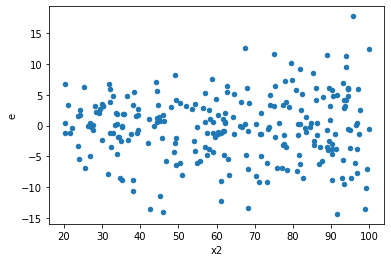

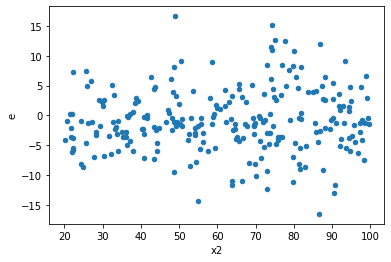

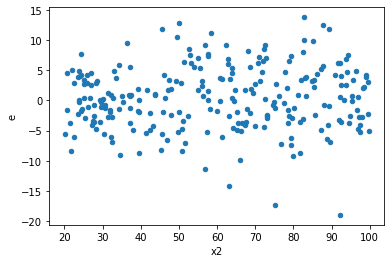

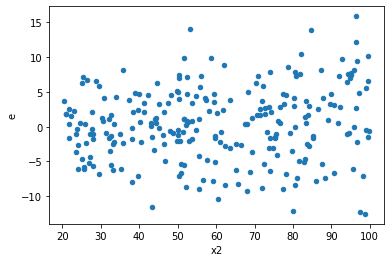

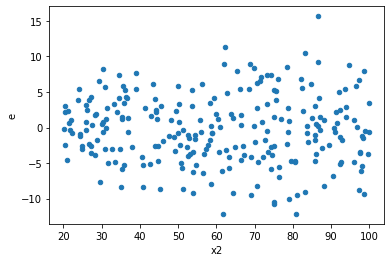

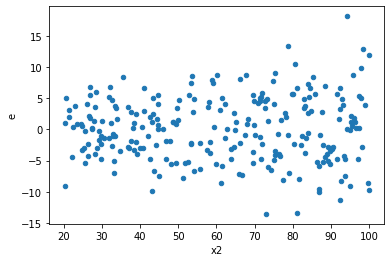

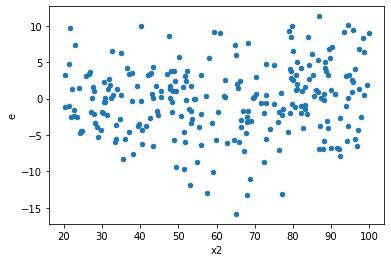

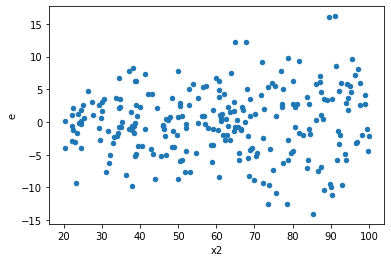

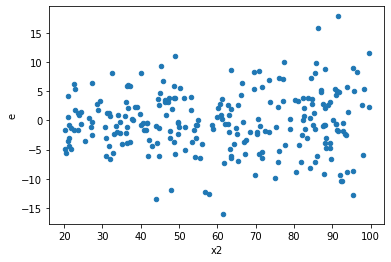

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,1542.323772862977,3329.506649202898,15.737997682275275,33.97455764492753,2.1587598581991756,0.00017400850436333215,0.9999129957478183,8.700425218166608e-05,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,1580.9180251360326,4229.117444045447,16.13181658302074,43.15425963311681,2.675102299299514,1.8854654060262988e-06,0.999999057267297,9.427327030131494e-07,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,1411.3395599707706,3172.738990363055,14.401424081334394,32.37488765676587,2.248033769016412,7.921956678136333e-05,0.9999603902166093,3.960978339068166e-05,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,1374.574884952734,3490.0314063203,14.026274336252389,35.61256537061531,2.538989650200329,6.152248724466958e-06,0.9999969238756378,3.076124362233479e-06,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,1627.2257721244973,4057.7549780756026,16.60434461351528,41.40566304158778,2.4936643996105214,9.142116370153275e-06,0.9999954289418149,4.571058185076637e-06,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,1506.820757841687,3294.0097730012267,15.375722018792725,33.6123446224615,2.1860660970183616,0.00013679534410804273,0.999931602327946,6.839767205402136e-05,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,1709.1813337078388,3088.763562483657,17.44062585416162,31.51799553554752,1.8071596626807294,0.0037229250459422936,0.9981385374770289,0.0018614625229711468,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,1776.4338796528712,2554.890391163174,18.12687632298848,26.07031011390994,1.4382130516799305,0.07357051211163901,0.9632147439441805,0.036785256055819504,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,1710.136784854098,2649.57855926776,17.450375355654064,27.03651591089551,1.5493372125164895,0.03131128307834263,0.9843443584608287,0.015655641539171317,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,1542.323772862977,3329.506649202898,15.737997682275275,33.97455764492753,2.1587598581991756,0.00017400850436333215,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,1580.9180251360326,4229.117444045447,16.13181658302074,43.15425963311681,2.675102299299514,1.8854654060262988e-06,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,1411.3395599707706,3172.738990363055,14.401424081334394,32.37488765676587,2.248033769016412,7.921956678136333e-05,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,1374.574884952734,3490.0314063203,14.026274336252389,35.61256537061531,2.538989650200329,6.152248724466958e-06,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,1627.2257721244973,4057.7549780756026,16.60434461351528,41.40566304158778,2.4936643996105214,9.142116370153275e-06,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,1506.820757841687,3294.0097730012267,15.375722018792725,33.6123446224615,2.1860660970183616,0.00013679534410804273,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,1709.1813337078388,3088.763562483657,17.44062585416162,31.51799553554752,1.8071596626807294,0.0037229250459422936,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,1776.4338796528712,2554.890391163174,18.12687632298848,26.07031011390994,1.4382130516799305,0.07357051211163901,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,1710.136784854098,2649.57855926776,17.450375355654064,27.03651591089551,1.5493372125164895,0.03131128307834263,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    910
Reject005=1 : Homoscedasticity       90
Name: Result_test, dtype: int64